In [1]:
### Import & setup
import sys
sys.path.append('C:\\Users\\szb37\\My Drive\\Projects\\ADAPT\\ADAPT codebase\\')
import src.folders as folders
import src.power as power
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.dpi'] = 300  # Set display DPI
plt.style.use('seaborn-v0_8-notebook')  # notebook-optimized

prefix = 'mock'
n_trials = 500
sample = 300
samples = np.arange(20, 110, 10).tolist() + np.arange(120, 320, 20).tolist()

def save_fig(fig, fname):
    for format in ['png', 'svg']:
        fig.savefig(
            fname=os.path.join(folders.powerplots, f'{fname}.{format}'),
            bbox_inches='tight',
            format=format,
            dpi=300,)

# Efficacy power plot

In [2]:
### Generate efficacy mock data & calc CIs, significance
df_patientsData=[]
for smd in np.arange(0, 1.2, 0.3):
    smd = round(smd, 1)
    df_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = f'SMD {smd}', 
            n_trials = n_trials, 
            sample = sample, 
            params = [
                {'type': 'normal',
                'arm_params':{
                    'C': {'mean': 1, 'sd': 1,},
                    'T': {'mean': 1+smd, 'sd': 1,}}}]))
        
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData = df_patientsData.rename(columns={'value': 'outcome',})    

# Calculate CIs
df_CIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData = df_patientsData, 
    samples = samples,
    col = 'outcome',)
df_CIs = power.Stats.add_sigdiff(df_CIs)
df_CIs.head(3)

,scenario,trial,sample,outcome_diff,outcome_ciL,outcome_ciH,outcome_moe,outcome_sigdiff
0,SMD 0.0,0,20,0.070,-0.709,0.849,0.779,False
1,SMD 0.0,0,30,0.116,-0.483,0.714,0.599,False
2,SMD 0.0,0,40,0.078,-0.597,0.753,0.675,False


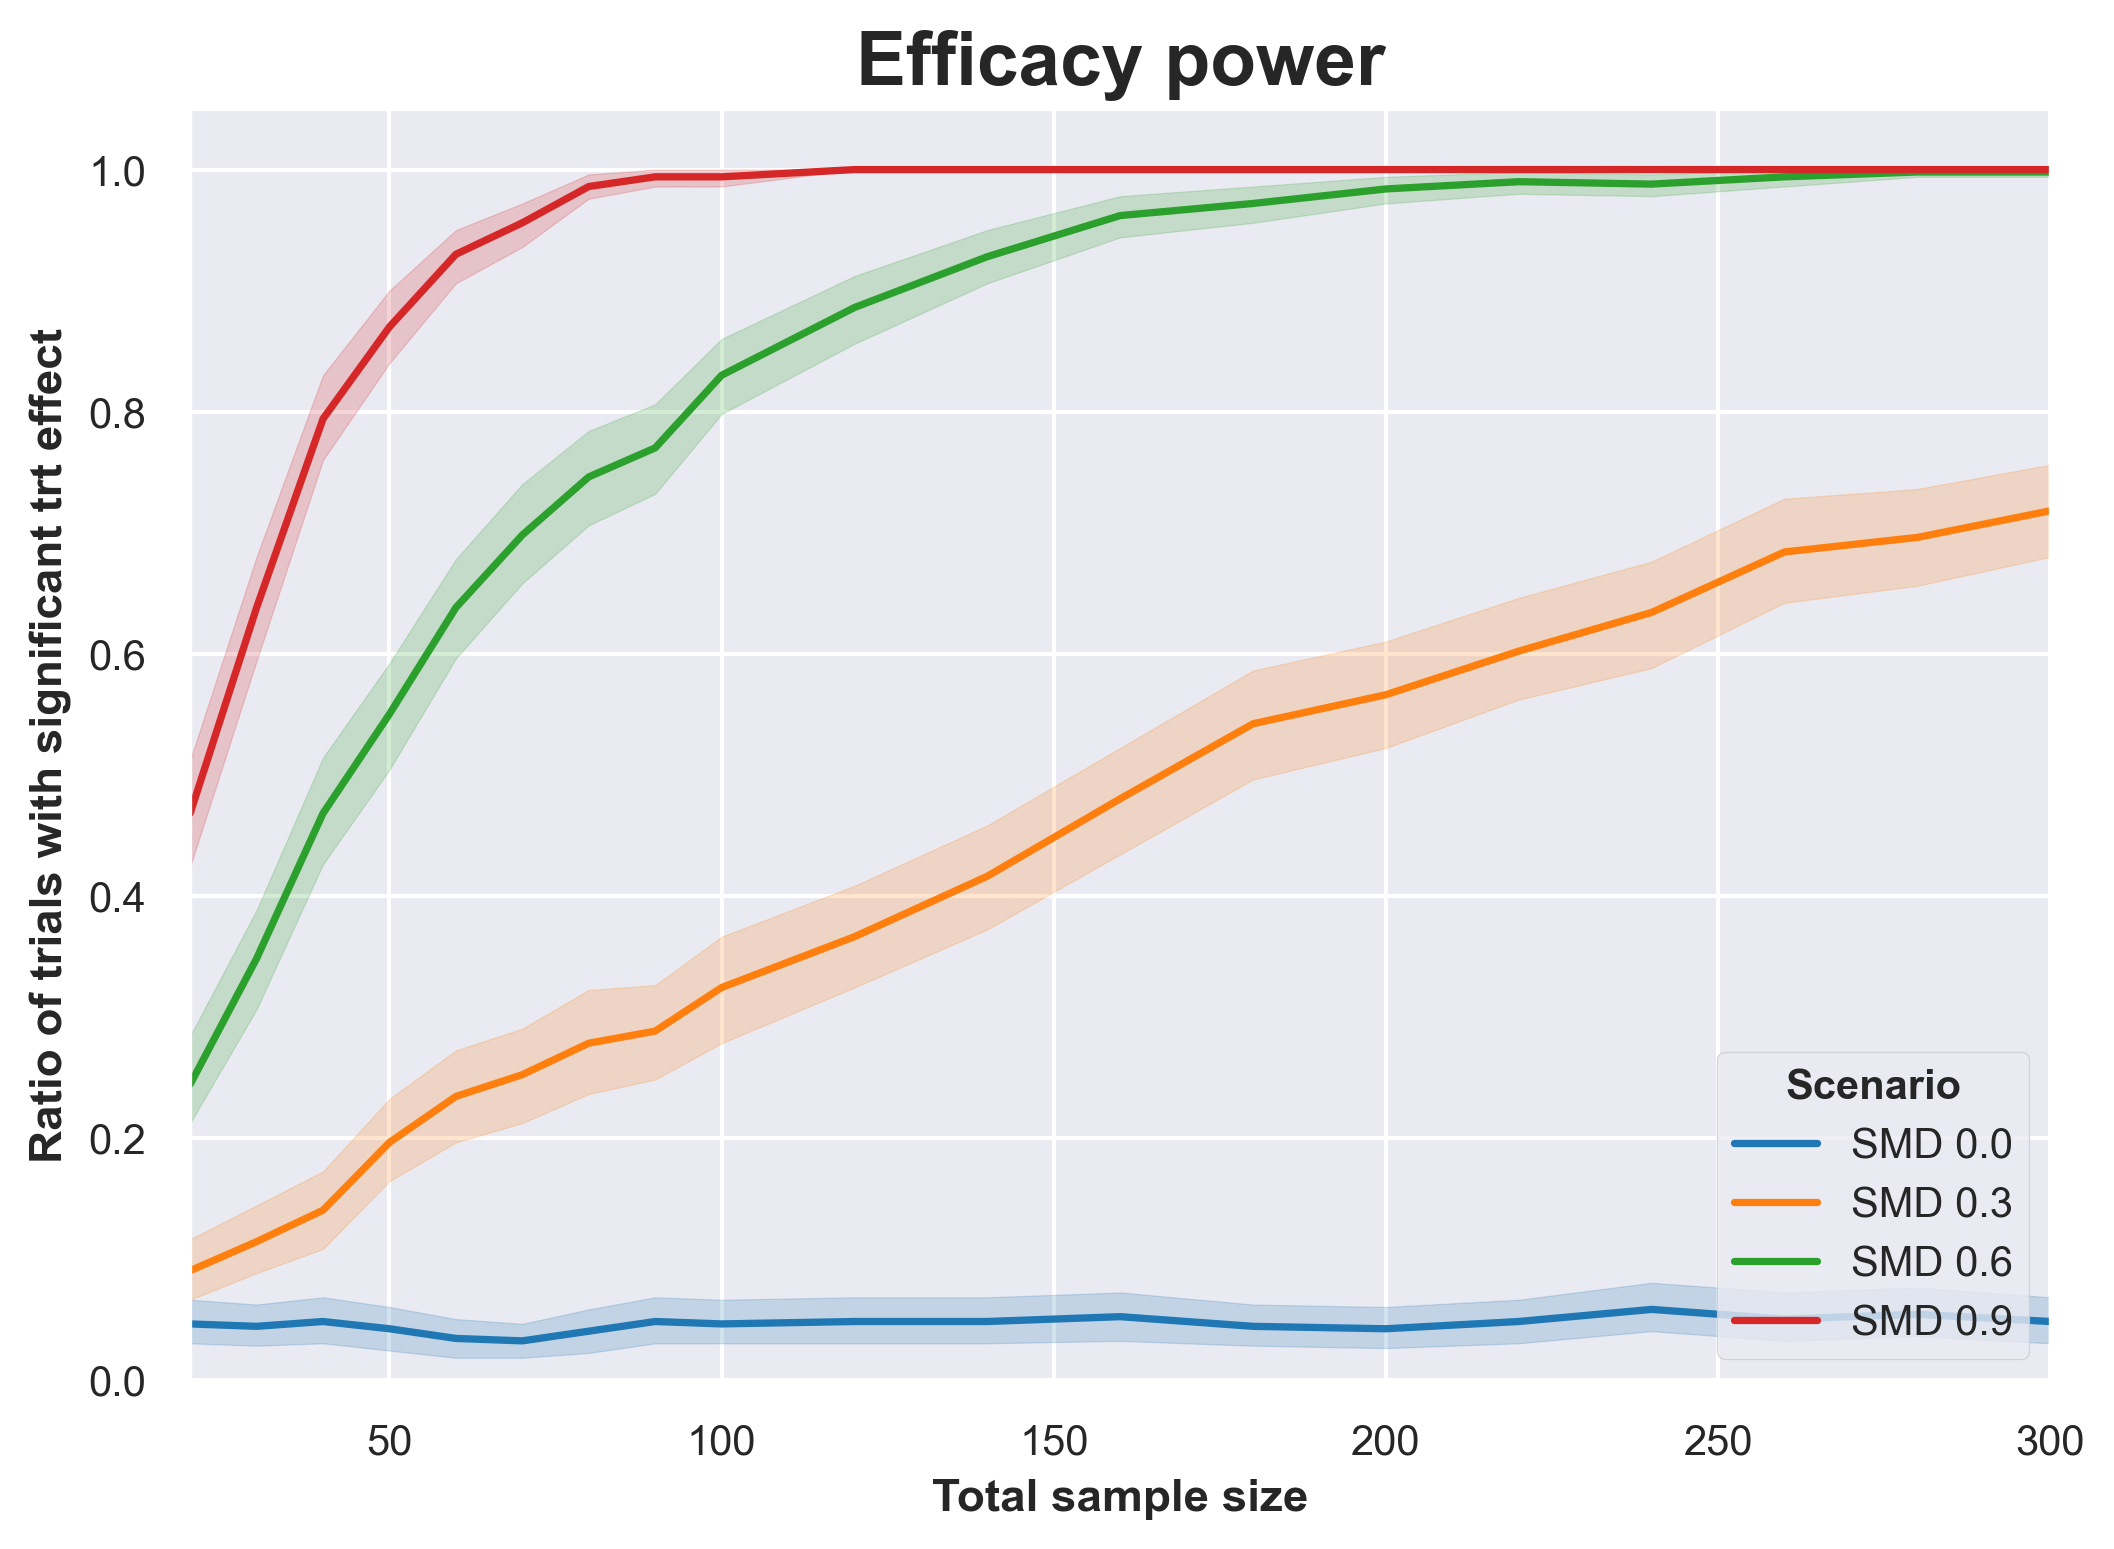

In [3]:
### Efficacy power plot
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'outcome_sigdiff',
    hue = 'scenario',
)

plt.title('Efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'}, 
    loc='lower right',)

save_fig(fig, 'power_effiacy_theory')
plt.show()

# Unmasking power plots

## Unmasking power plot - Correct Guess Rate (CGR)

In [4]:
### Generate CGR mock data & calc CIs, significance
df_patientsData=[]
for cgr in np.arange(0.5, 0.7, 0.05):
    cgr = round(cgr, 2)
    df_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = f'CGR {cgr}', 
            n_trials = n_trials, 
            sample = sample, 
            params = [{
                'type': 'binaryguess',
                'arm_params':{
                    'C': {'cgr': cgr},
                    'T': {'cgr': cgr},},}]))       
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData = df_patientsData.rename(columns={'value': 'cgr',})    

# Calculate CIs
df_CIs = power.Stats.get_df_cgrCIs_vector(
    df_patientsData = df_patientsData, 
    samples = samples,) 
df_CIs = power.Stats.add_sigdiff(df_CIs)
df_CIs.head(3)

,scenario,trial,sample,cgr,cgr_ciL,cgr_ciH,cgr_moe,cgr_sigdiff
0,CGR 0.5,0,20,0.500,0.272,0.728,0.228,False
1,CGR 0.5,0,30,0.433,0.255,0.626,0.186,False
2,CGR 0.5,0,40,0.425,0.270,0.591,0.160,False


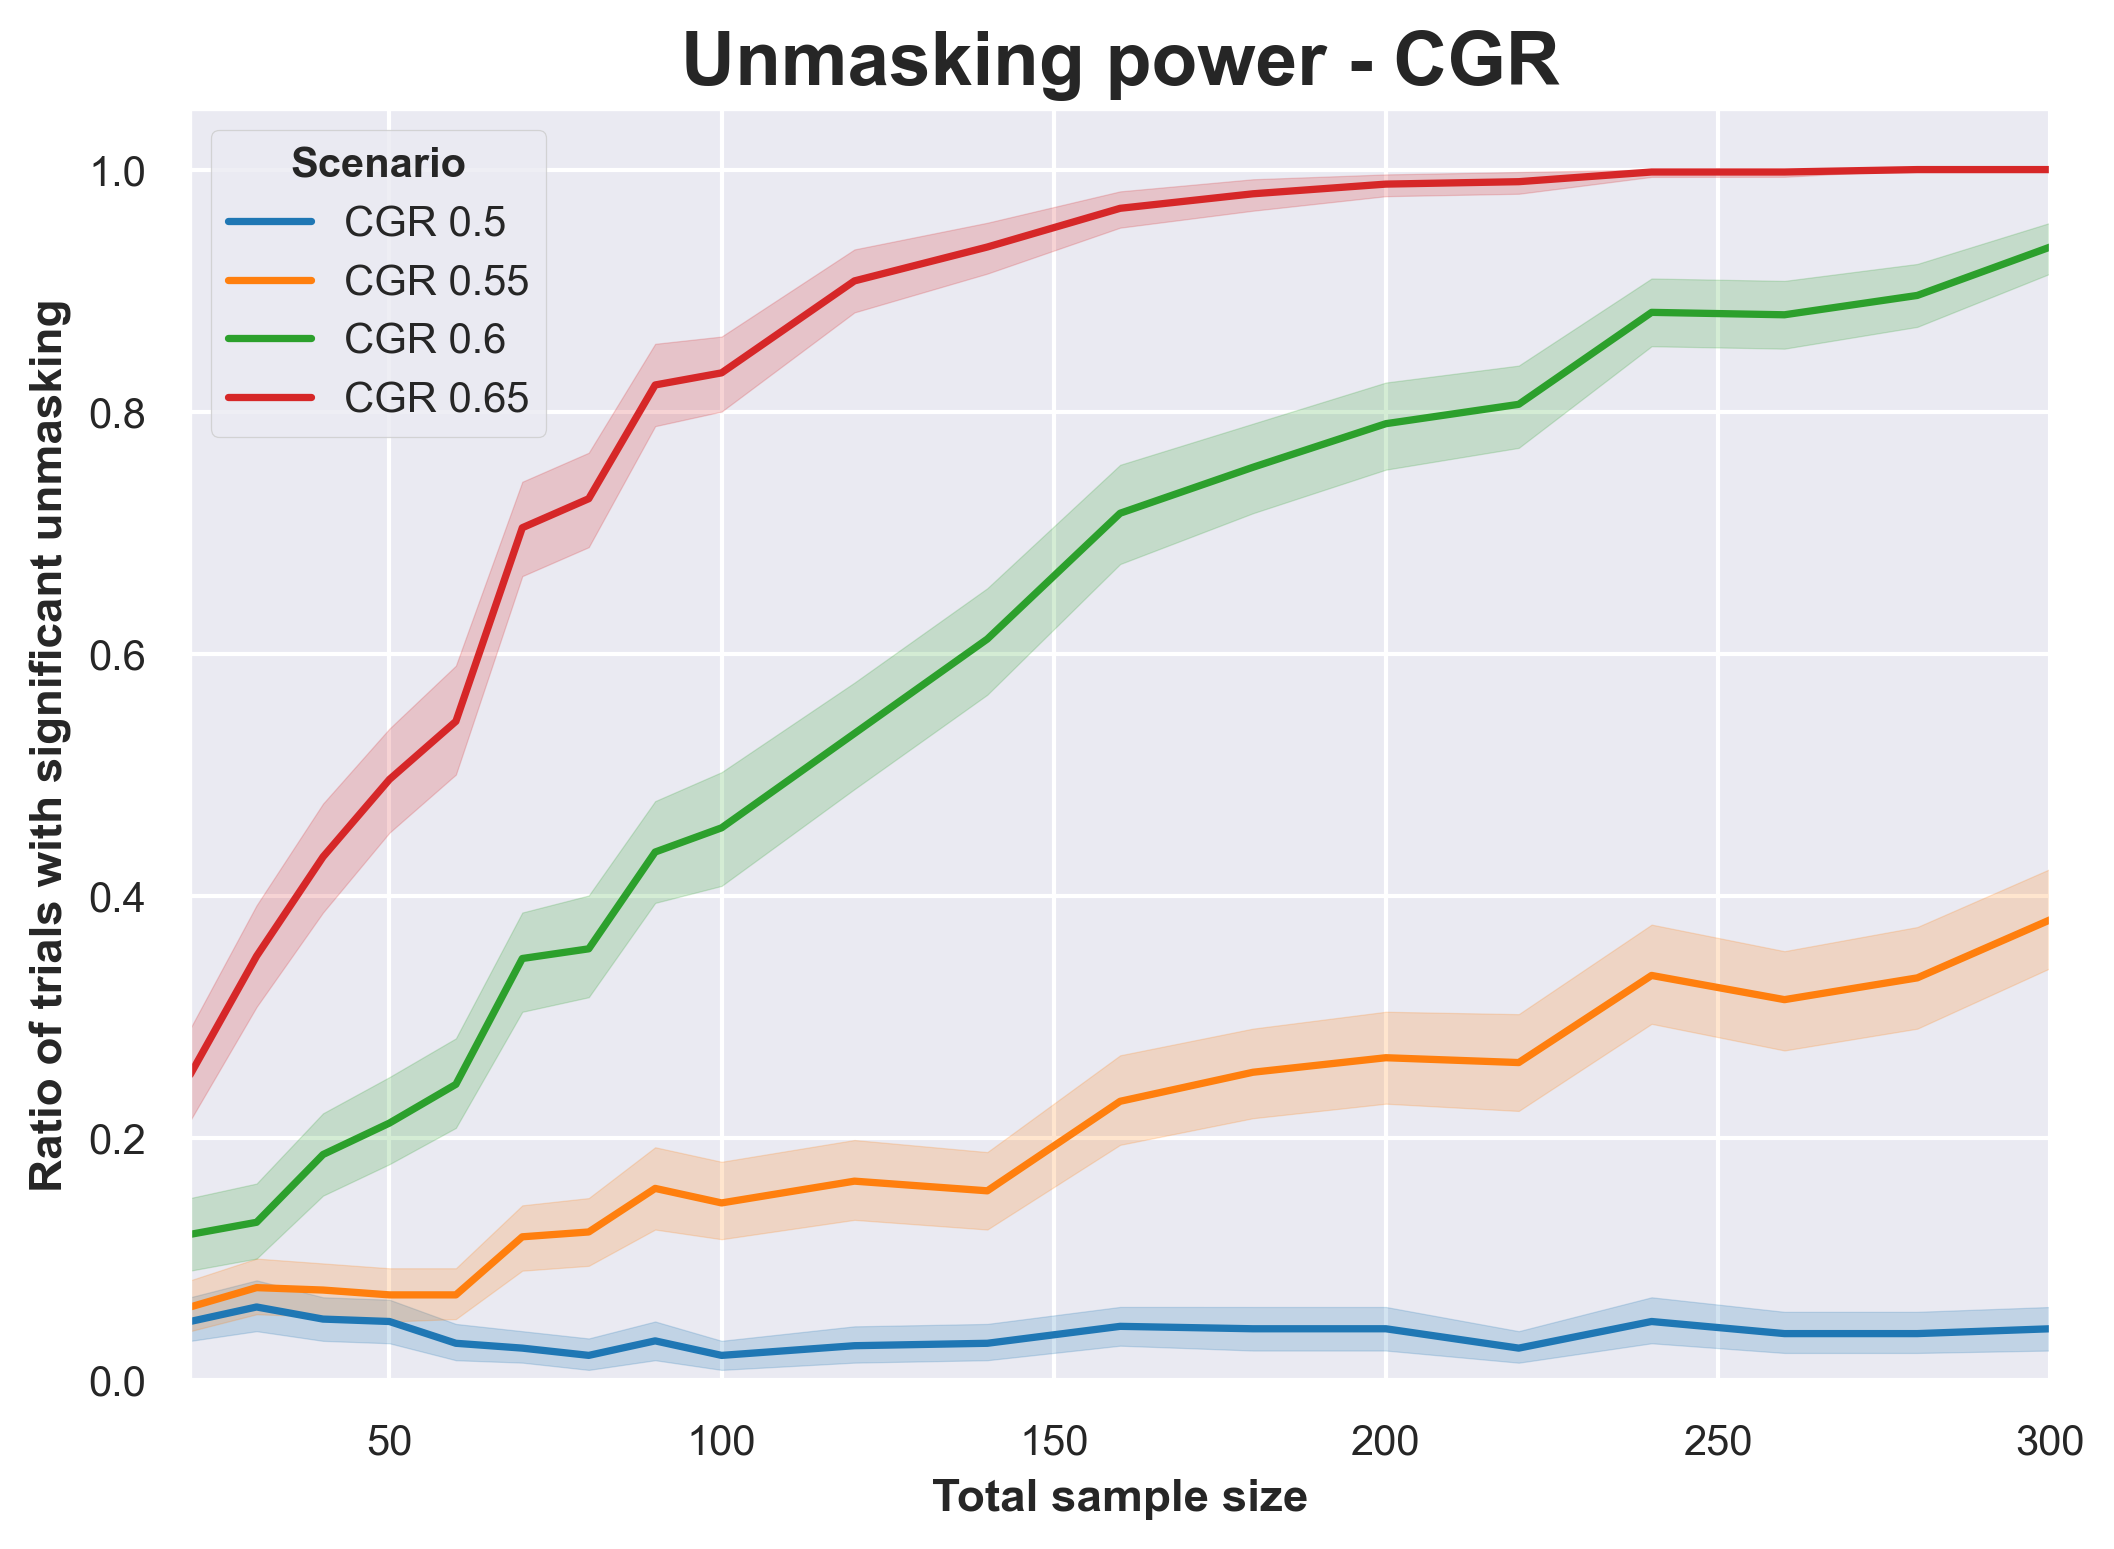

In [5]:
### Unmasking power plot (CGR)
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'cgr_sigdiff',
    hue = 'scenario',
)

plt.title('Unmasking power - CGR', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},)

save_fig(fig, 'power_unmasking_cgr_theory')
plt.show()

## Unmasking power plot - Guessed mg (GMG)

In [6]:
### Generate GMG mock data & calc CIs, significance
df_patientsData = []
sd = 7.6 # This the average SD in POP data
for diff in np.arange(0, 6, 1.5):
    diff = round(diff, 1)
    df_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = f'Δ guess {diff}mg', 
            n_trials = n_trials, 
            sample = sample, 
            params = [{
                'type': 'normal',
                'arm_params':{
                    'C': {'mean':      10, 'sd': sd,},
                    'T': {'mean': 10+diff, 'sd': sd,},},}]))
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData = df_patientsData.rename(columns={'value': 'gmg',})    

### Calculate CIs
df_CIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData, 
    samples = samples,
    col='gmg',)
df_CIs = power.Stats.add_sigdiff(df_CIs)
df_CIs.head(3)

,scenario,trial,sample,gmg_diff,gmg_ciL,gmg_ciH,gmg_moe,gmg_sigdiff
0,Δ guess 0.0mg,0,20,0.684,-6.070,7.438,6.754,False
1,Δ guess 0.0mg,0,30,-0.735,-6.072,4.602,5.337,False
2,Δ guess 0.0mg,0,40,-0.695,-4.687,3.298,3.993,False


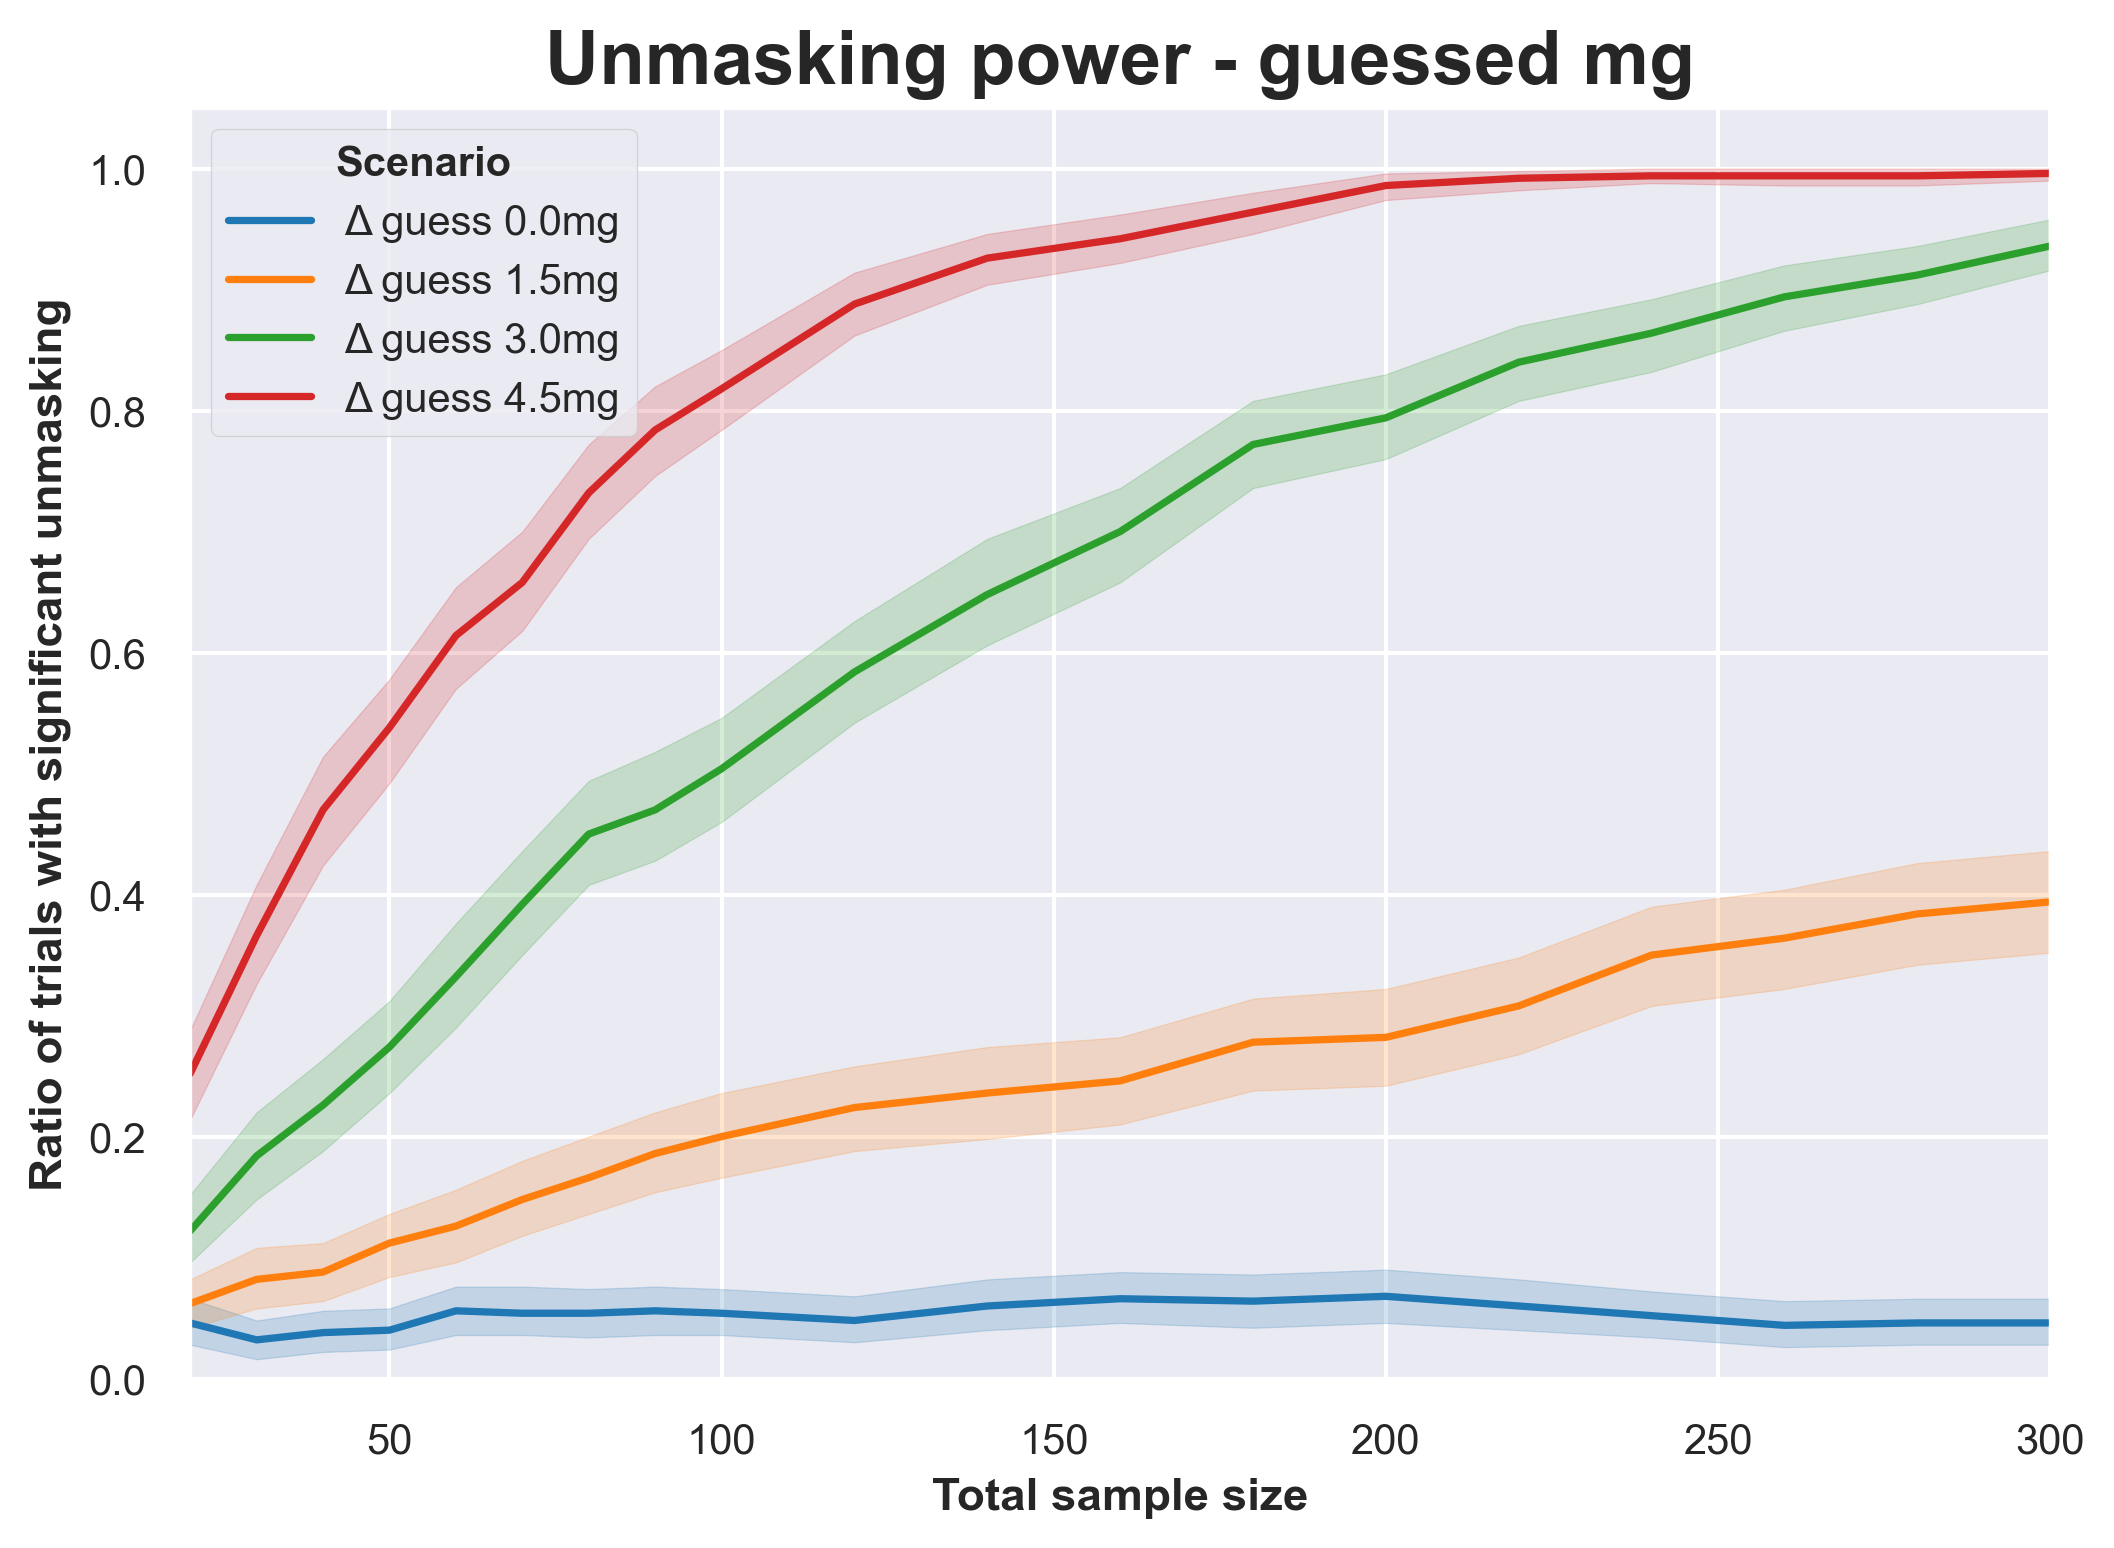

In [7]:
### Unmasking power plot (GMG)
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'gmg_sigdiff',
    hue = 'scenario',
)

plt.title('Unmasking power - guessed mg', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='upper left')

plt.show()
save_fig(fig, 'power_unmasking_gmg_theory')

# Mixed power plots (efficacy & unmasking) - theory

In [8]:
### Generate OUTCOME mock data & calc CIs, significance
smd = 0.6
df_outcome_patientsData = power.DataGeneration.get_df_patientsData(
    scenario = f'SMD {smd}', 
    n_trials = n_trials, 
    sample = sample, 
    params = [{'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 1+smd, 'sd': 1,},},}])
df_outcome_patientsData = df_outcome_patientsData.rename(columns={'value': 'outcome',})    

# Calculate outcome CIs
df_outcomeCIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData = df_outcome_patientsData, 
    samples = samples,
    col = 'outcome')
df_outcomeCIs = power.Stats.add_sigdiff(df_outcomeCIs)
df_outcomeCIs.head(3)

,scenario,trial,sample,outcome_diff,outcome_ciL,outcome_ciH,outcome_moe,outcome_sigdiff
0,SMD 0.6,0,20,-0.971,-1.934,-0.009,0.963,True
1,SMD 0.6,0,30,-1.094,-1.883,-0.304,0.789,True
2,SMD 0.6,0,40,-1.034,-1.721,-0.346,0.687,True


## Efficacy vs. CGR unmasking power

In [9]:
### Generate CGR mock data & calc CIs, significance
df_patientsData=[]
for cgr in np.arange(0.54, 0.58, 0.01):
    cgr = round(cgr, 2)
    df_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = f'CGR {cgr}', 
            n_trials = n_trials, 
            sample = sample, 
            params = [{
                'type': 'binaryguess',
                'arm_params':{
                    'C': {'cgr': cgr},
                    'T': {'cgr': cgr},},}]))       
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData = df_patientsData.rename(columns={'value': 'cgr',})    

# Calculate CIs
df_cgrCIs = power.Stats.get_df_cgrCIs_vector(
    df_patientsData = df_patientsData, 
    samples = samples,) 
df_cgrCIs = power.Stats.add_sigdiff(df_cgrCIs)
df_cgrCIs.head(3)

,scenario,trial,sample,cgr,cgr_ciL,cgr_ciH,cgr_moe,cgr_sigdiff
0,CGR 0.54,0,20,0.750,0.509,0.913,0.202,True
1,CGR 0.54,0,30,0.633,0.439,0.801,0.181,False
2,CGR 0.54,0,40,0.650,0.483,0.794,0.155,False


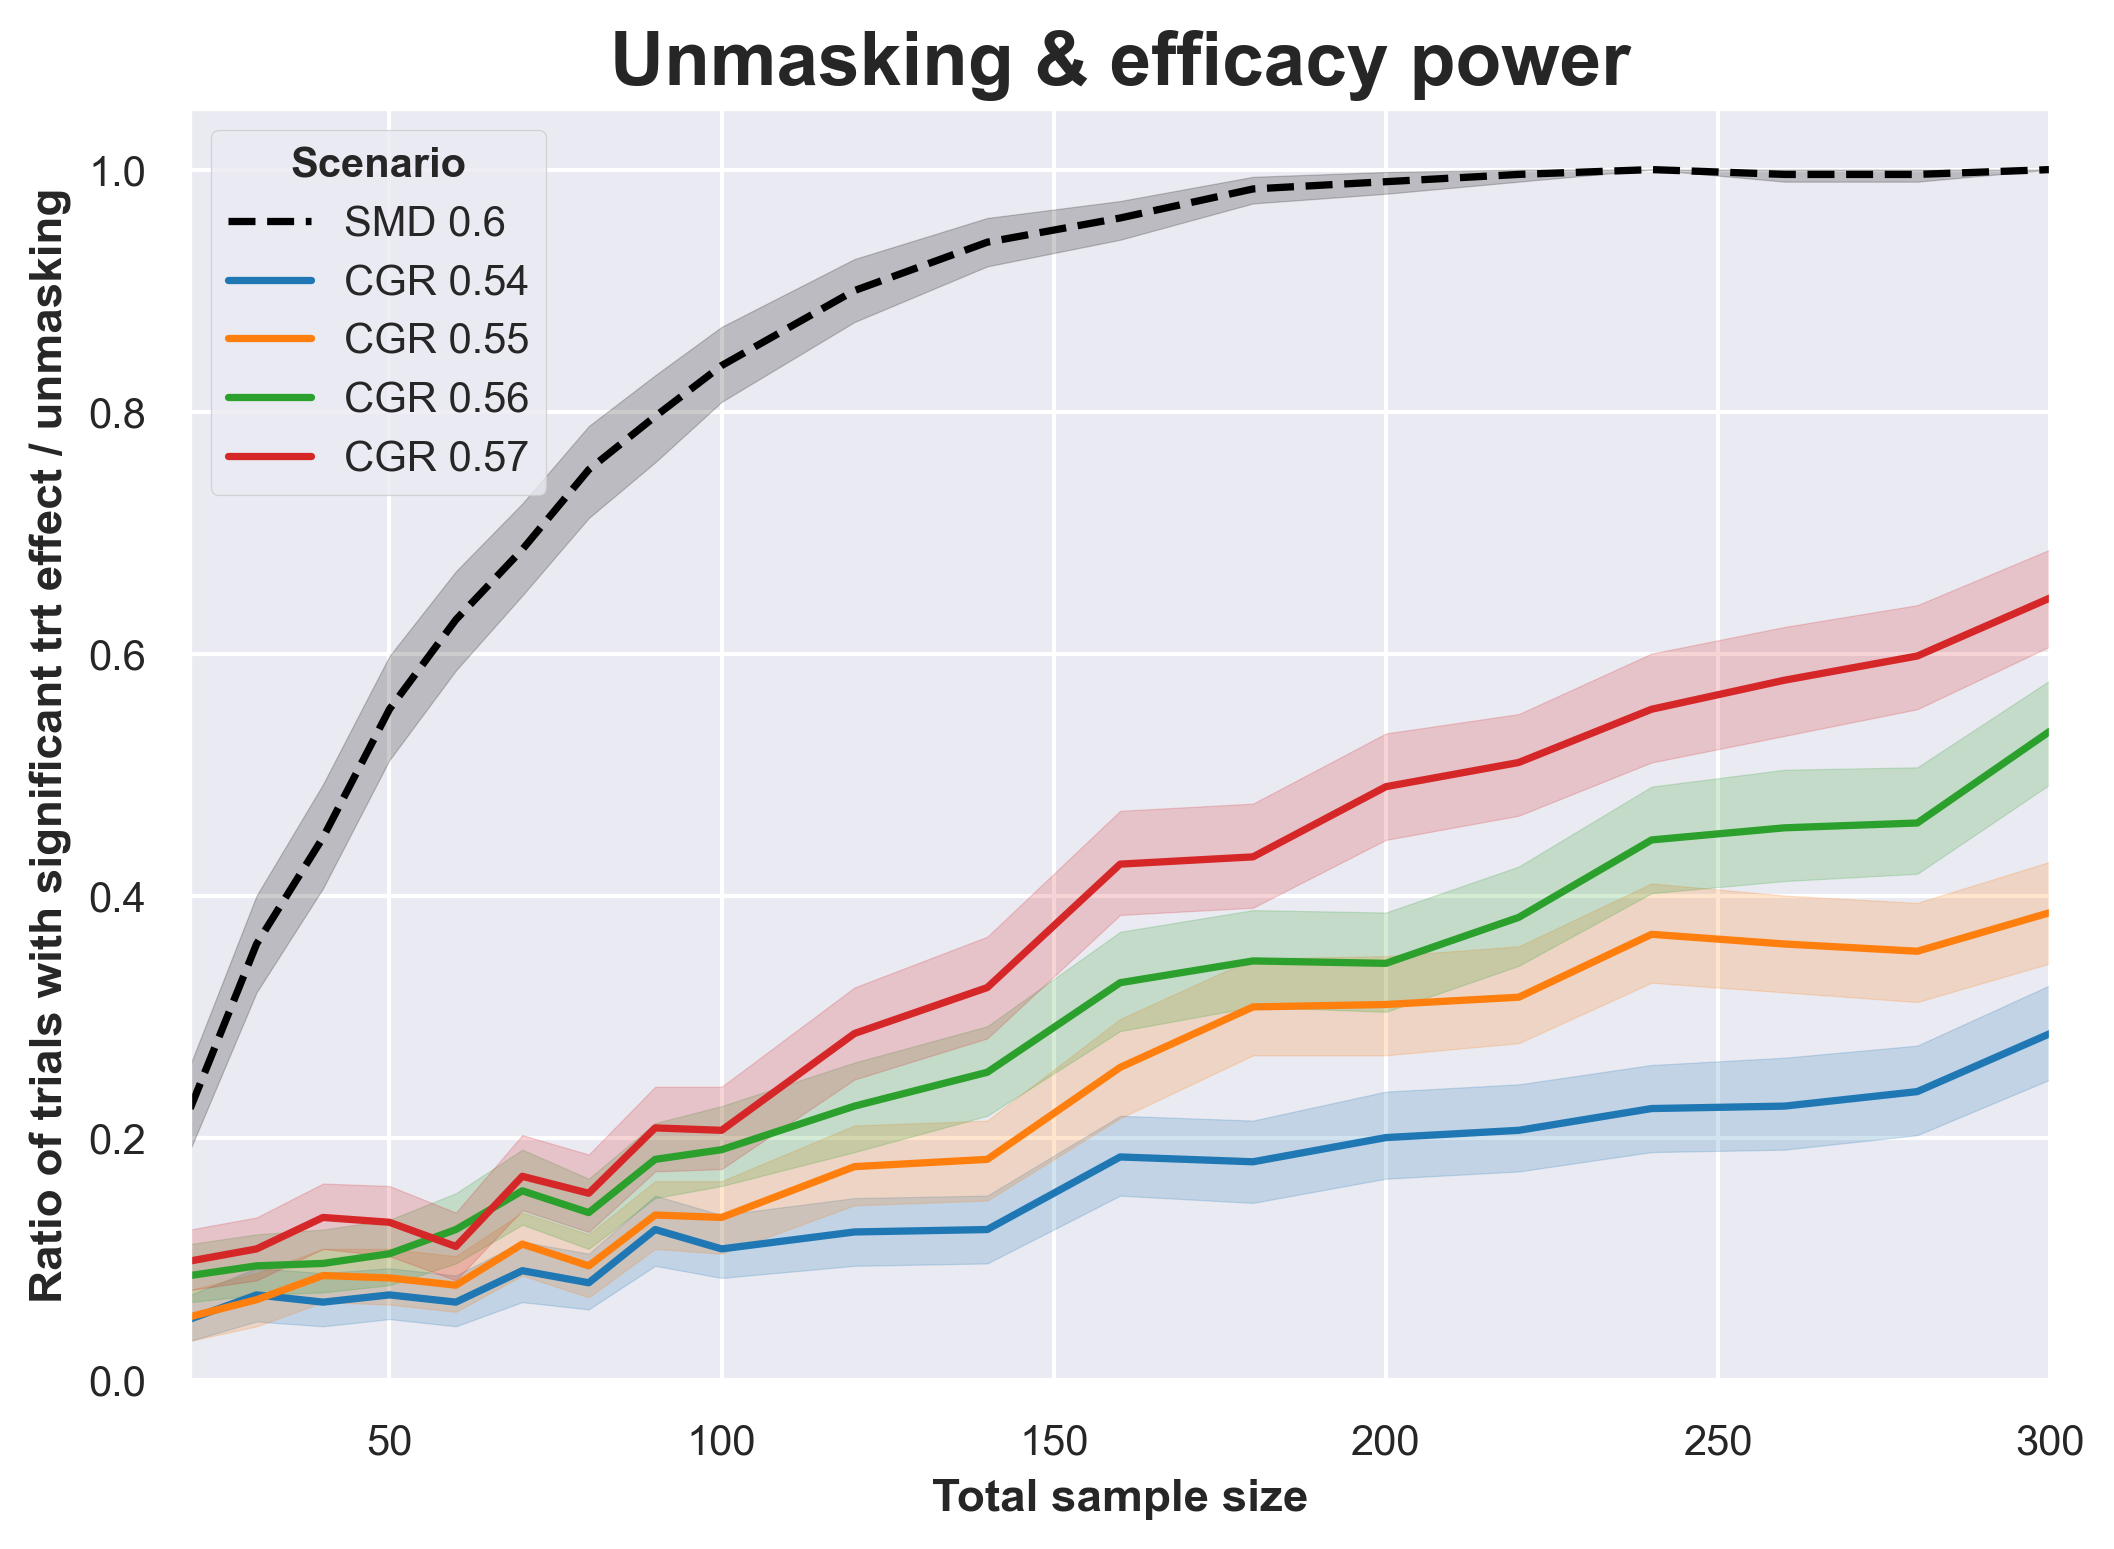

In [10]:
### Efficacy & CGR unmasking power plot
fig, ax = plt.subplots()
sns.lineplot( # Efficacy power
    data = df_outcomeCIs,
    x = 'sample', 
    y = 'outcome_sigdiff',
    linestyle = '--',
    color='black',
    label='SMD 0.6',
)

sns.lineplot( # Unmasking power
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_sigdiff',
    hue = 'scenario',
    linestyle = '-',
)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},)

save_fig(fig, 'power_mixed_cgr_theory')
plt.show()

## Efficacy vs. GMG unmasking power

In [13]:
### Generate GMG mock data & calc CIs & significance
df_patientsData=[]
for diff in np.arange(0.5, 2.5, 0.5):
    diff = round(diff, 1)
    df_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = f'Δ guess {diff}mg', 
            n_trials = n_trials, 
            sample = sample, 
            params = [{'type': 'normal',
                'arm_params':{
                    'C': {'mean':      10, 'sd': sd,},
                    'T': {'mean': 10+diff, 'sd': sd,},},}]))           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData = df_patientsData.rename(columns={'value': 'gmg',})    

### Calculate CIs
df_gmgCIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData = df_patientsData, 
    samples = samples,
    col = 'gmg')
df_gmgCIs = power.Stats.add_sigdiff(df_gmgCIs)
df_gmgCIs.head(3)

,scenario,trial,sample,gmg_diff,gmg_ciL,gmg_ciH,gmg_moe,gmg_sigdiff
0,Δ guess 0.5mg,0,20,0.793,-4.583,6.169,5.376,False
1,Δ guess 0.5mg,0,30,-1.690,-6.268,2.888,4.578,False
2,Δ guess 0.5mg,0,40,-0.615,-4.954,3.723,4.338,False


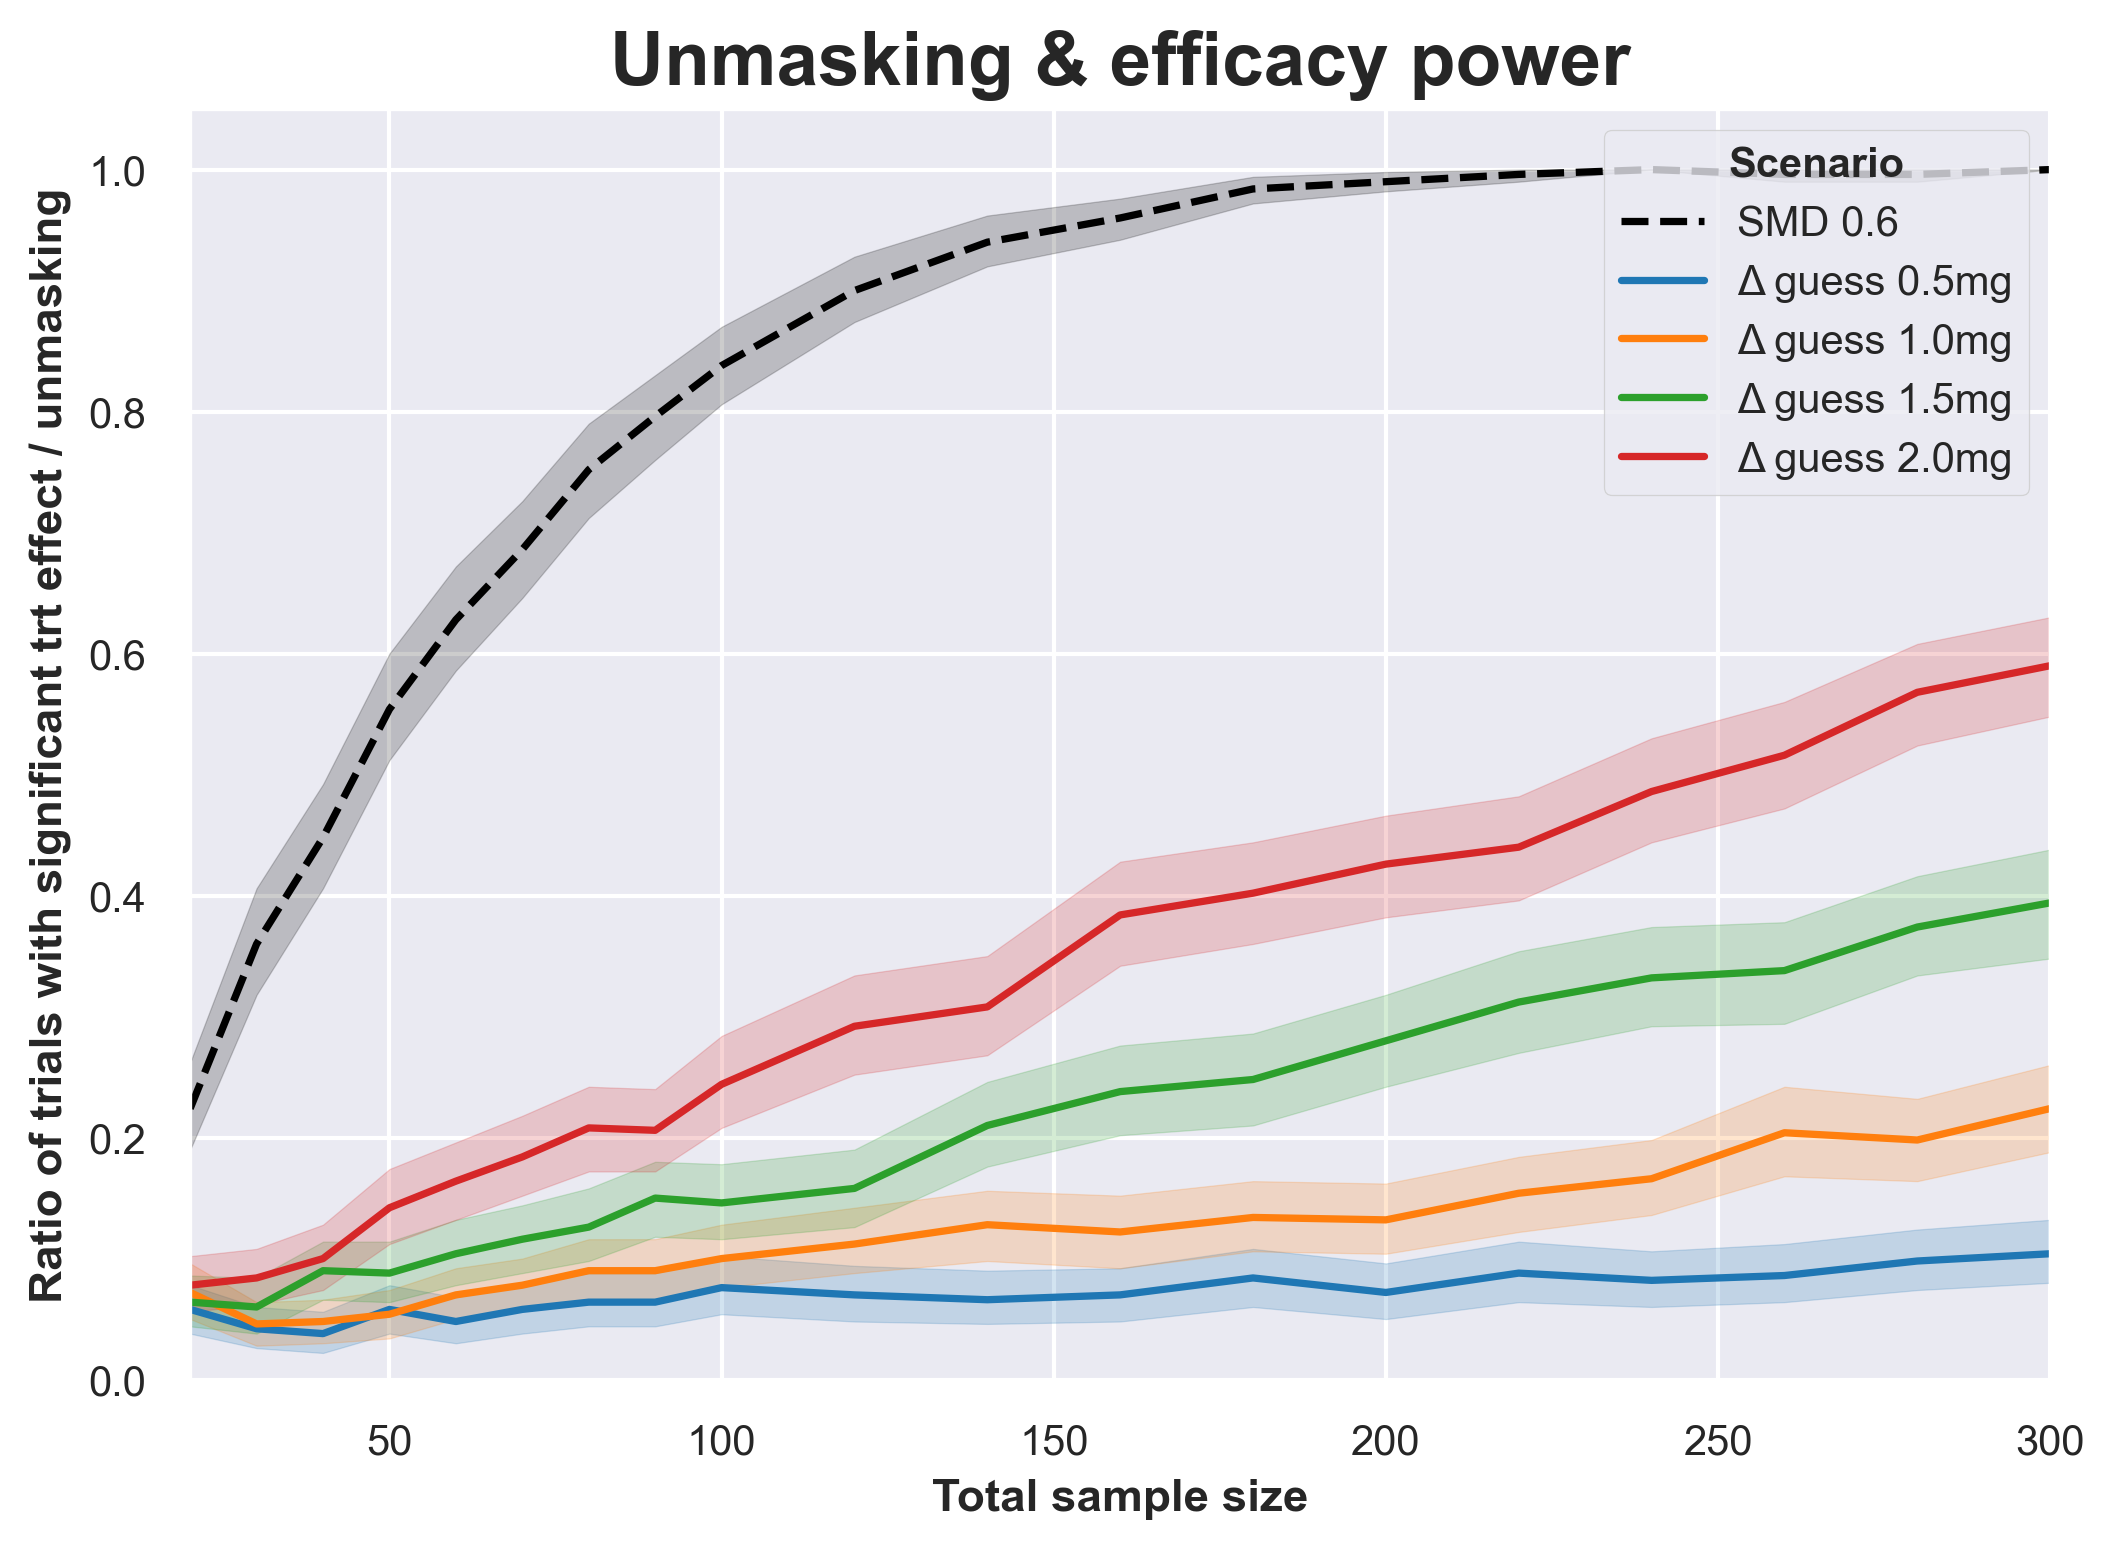

In [16]:
### Unmasking & efficacy power plot (GMG)
fig, ax = plt.subplots()

sns.lineplot(
    data = df_outcomeCIs,
    x = 'sample', 
    y = 'outcome_sigdiff',
    linestyle = '--',
    color='black',
    label='SMD 0.6',
)

sns.lineplot(
    data = df_gmgCIs,
    x = 'sample', 
    y = 'gmg_sigdiff',
    hue = 'scenario',
    linestyle = '-',
)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='upper right')

save_fig(fig, 'power_mixed_gmg_theory')
plt.show()

# Mixed power plots (efficacy & unmasking) - Real world trials

In [17]:
### Generate OUTCOME mock data & calc CIs, significance
scenario_params = []
scenario_params.append(
    ('Goodwin SMD 0.8', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 1.8, 'sd': 1,},},}))
scenario_params.append(
    ('Raison SMD 1.2', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 2.2, 'sd': 1,},},}))
scenario_params.append(
    ('Carhart-H. SMD 1.3', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 2.3, 'sd': 1,},},}))

df_outcome_patientsData = []
for scenario_param in scenario_params:
    df_outcome_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario = scenario_param[0], 
            n_trials = n_trials, 
            sample = sample, 
            params = [scenario_param[1]]))        
df_outcome_patientsData = pd.concat(df_outcome_patientsData, ignore_index=True)
df_outcome_patientsData = df_outcome_patientsData.rename(columns={'value': 'outcome',})    

### Calculate OUTCOME CIs
df_outcomeCIs = power.Stats.get_df_diffCIs_vector(
    df_outcome_patientsData, 
    samples = samples,
    col = 'outcome') 
df_outcomeCIs = power.Stats.add_sigdiff(df_outcomeCIs)
df_outcomeCIs.head(3)

,scenario,trial,sample,outcome_diff,outcome_ciL,outcome_ciH,outcome_moe,outcome_sigdiff
0,Carhart-H. SMD 1.3,0,20,-0.735,-2.080,0.609,1.344,False
1,Carhart-H. SMD 1.3,0,30,-1.163,-2.106,-0.220,0.943,True
2,Carhart-H. SMD 1.3,0,40,-1.008,-1.773,-0.242,0.765,True


In [18]:
### Generate point estimate CGR mock data & calc CIs, significance
scenario_params = []
scenario_params.append(
    ('Bogenschutz 2023 (CGR:0.94)', 
    {'type': 'binaryguess',
        'arm_params':{
            'C': {'cgr': 0.94},
            'T': {'cgr': 0.94},                
        },}))
scenario_params.append(
    ('POP (CGR:0.83)', 
    {'type': 'binaryguess',
        'arm_params':{
            'C': {'cgr': 0.83},
            'T': {'cgr': 0.83},                
        },}))

df_cgr_patientsData=[]
for scenario_param in scenario_params:
    df_cgr_patientsData.append(
        power.DataGeneration.get_df_patientsData(
            scenario =scenario_param[0], 
            n_trials = n_trials, 
            sample = sample, 
            params = [scenario_param[1]]))
df_cgr_patientsData = pd.concat(df_cgr_patientsData, ignore_index=True)

### Calculate CGR CIs
df_cgrCIs = power.Stats.get_df_cgrCIs_vector(
    df_cgr_patientsData, 
    samples = samples)
df_cgrCIs = power.Stats.add_sigdiff(df_cgrCIs)
df_cgrCIs.head(3)

,scenario,trial,sample,cgr,cgr_ciL,cgr_ciH,cgr_moe,cgr_sigdiff
0,Bogenschutz 2023 (CGR:0.94),0,20,0.950,0.751,0.999,0.124,True
1,Bogenschutz 2023 (CGR:0.94),0,30,0.967,0.828,0.999,0.086,True
2,Bogenschutz 2023 (CGR:0.94),0,40,0.925,0.796,0.984,0.094,True


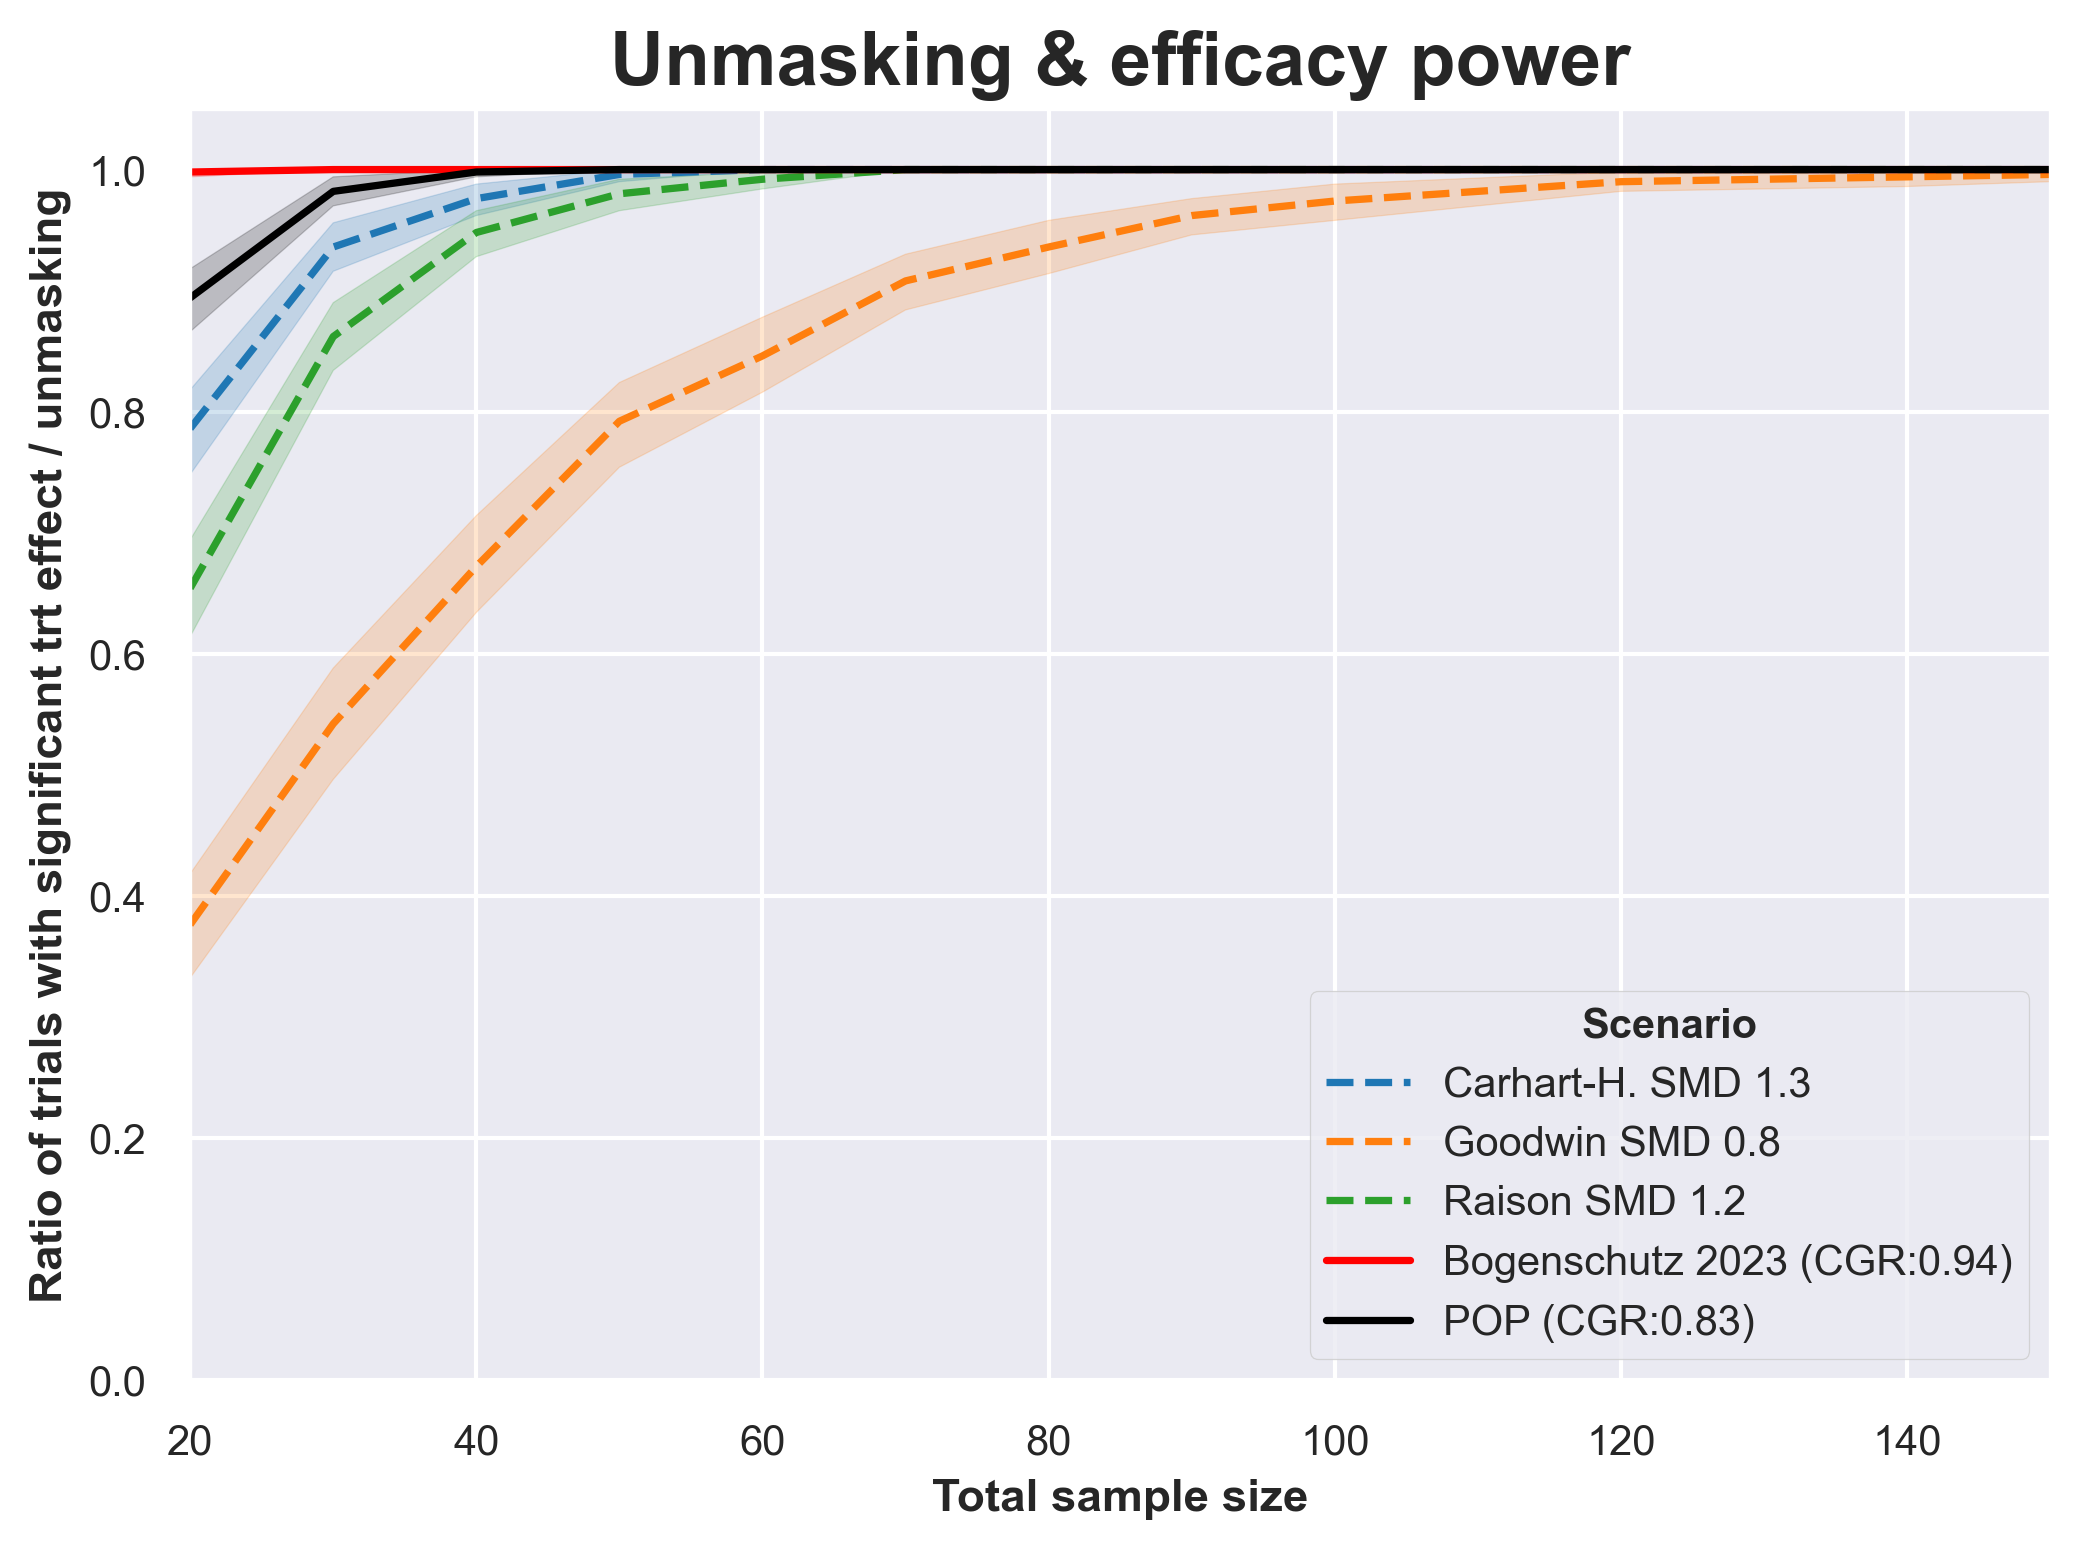

In [19]:
### Unmasking (CGR) & efficacy power plot 
fig, ax = plt.subplots()
sns.lineplot(
    data = df_outcomeCIs,
    x = 'sample', 
    y = 'outcome_sigdiff',
    hue = 'scenario',
    linestyle = '--',)

sns.lineplot(
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_sigdiff',
    palette = ['red', 'black'],
    hue = 'scenario',)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_outcomeCIs['sample'].min(), 150]) # df_outcomeCIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='lower right')

save_fig(fig, 'power_mixed_studies')
plt.show()

In [20]:
### Generate GMG mock data for POP & calc CIs, significance
df_gmg_patientsData = power.DataGeneration.get_df_patientsData(
    scenario = 'POP (Δ guess 13mg)', 
    n_trials = n_trials, 
    sample = sample, 
    params = [{
        'type': 'normal',
        'arm_params':{
            'C': {'mean':  5, 'sd':  4,},
            'T': {'mean': 18, 'sd': 10,},},}])
df_gmg_patientsData = df_gmg_patientsData.rename(columns={'value': 'gmg',})    

### Calculate OUTCOME CIs
df_popCIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData = df_gmg_patientsData, 
    samples = samples,
    col='gmg')
df_popCIs = power.Stats.add_sigdiff(df_popCIs)
df_popCIs.head(3)

,scenario,trial,sample,gmg_diff,gmg_ciL,gmg_ciH,gmg_moe,gmg_sigdiff
0,POP (Δ guess 13mg),0,20,-17.021,-24.451,-9.590,7.431,True
1,POP (Δ guess 13mg),0,30,-14.206,-19.255,-9.156,5.049,True
2,POP (Δ guess 13mg),0,40,-14.000,-18.209,-9.791,4.209,True


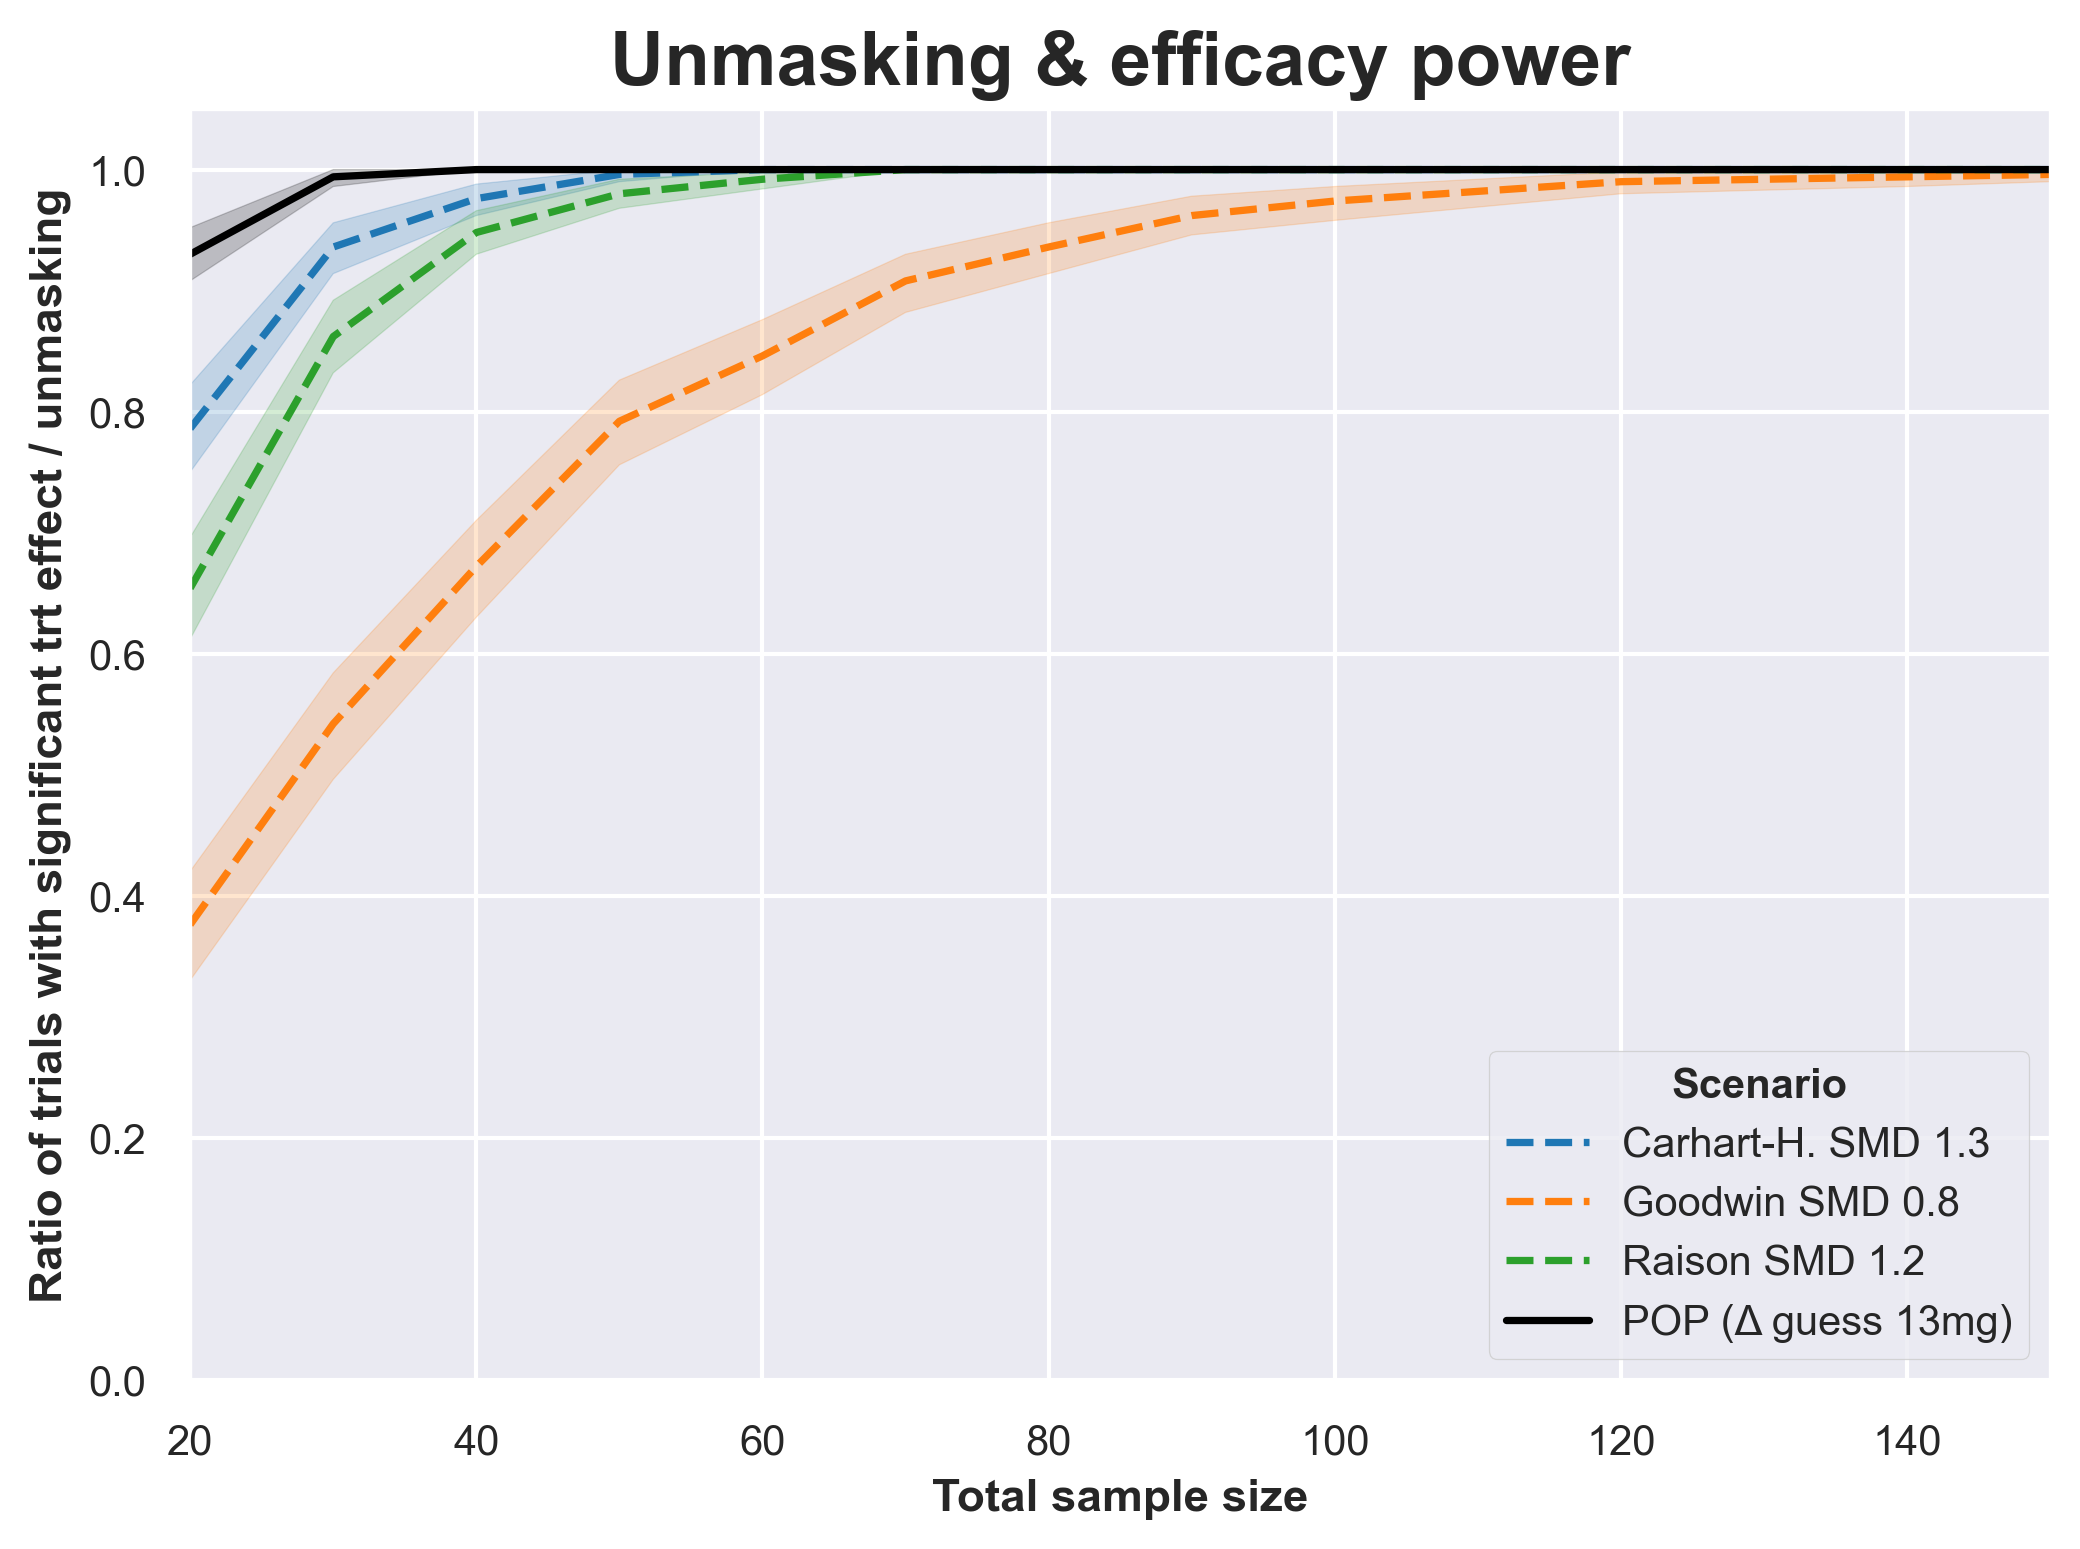

In [21]:
### Unmasking (GMG) & efficacy power plot
fig, ax = plt.subplots()
sns.lineplot(
    data = df_outcomeCIs,
    x = 'sample', 
    y = 'outcome_sigdiff',
    hue = 'scenario',
    linestyle = '--',)

sns.lineplot(
    data = df_popCIs,
    x = 'sample', 
    y = 'gmg_sigdiff',
    palette = ['black'],
    hue = 'scenario',)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_outcomeCIs['sample'].min(), 150]) # df_diffCIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='lower right')

save_fig(fig, 'power_mixed_studies_gmg')
plt.show()